### Exploratory Data Analysis

For this initial step, we want to get a feel for the data and try to understand any underlying context that may benefit us later on when it comes to model building. I have already downloaded the dataset from the Kaggle site, so just need to read in the CSV file.

### Code

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female

Dataset is loaded in. Let's do a quick overview of the correlations between some of the numerical variables and the response variable. 

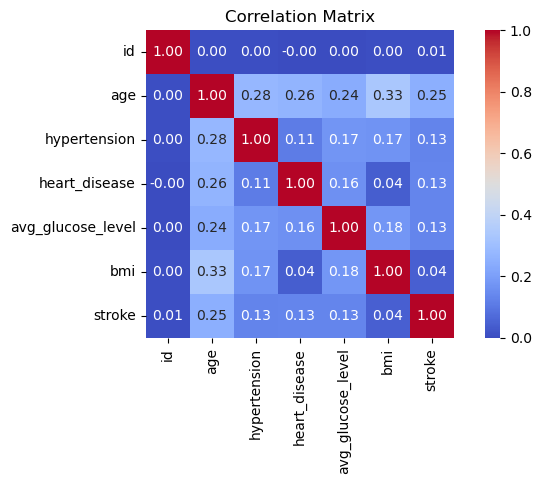

In [8]:
# Check correlation heat map
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
stroke_corr = corr_matrix[['stroke']].sort_values(by='stroke', ascending=False)
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

From first glance, it appears that the variable `age` has the strongest correlation with the response variable `stroke`, while `bmi` has the weakest correlation. The feature `id` will have no predictive power in this problem, so we can ignore results relating to that variable. It is interesting that all have these features have a positive correlation with the response variable. Also, all of the other numerical features appear to have the strongest correlation with the `age` feature. This seems like it will be an influential feature, so we'll begin exploring the data points of `age`.

In [15]:
print(df['age'].describe())

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64


The average age in this dataset is about 43 years old and ranges from 0.08 years old to 82 years old. A patient in only being 0.08 years old (less than 1 month old) seems a bit odd for this dataset. Could this be a data entry/recording issue?

In [20]:
print(df[df['age'] < 1])

         id  gender   age  hypertension  heart_disease ever_married work_type  \
363    7559  Female  0.64             0              0           No  children   
376   22706  Female  0.88             0              0           No  children   
564   61511  Female  0.32             0              0           No  children   
982   54747    Male  0.88             0              0           No  children   
996   53279    Male  0.24             0              0           No  children   
1093  66772  Female  0.32             0              0           No  children   
1206  68908  Female  0.72             0              0           No  children   
1317  30084    Male  0.80             0              0           No  children   
1600  40544    Male  0.40             0              0           No  children   
1614  47350  Female  0.08             0              0           No  children   
1808  53126  Female  0.64             0              0           No  children   
1975   6596    Male  0.56   

Nope - looks like this dataset covers a wide range of ages. Let's check the distribution of the `age` feature.

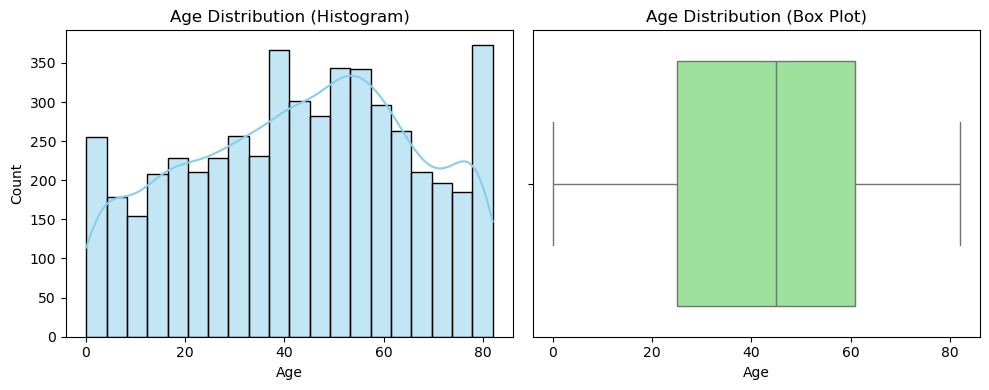

In [33]:
# Plot histogram to analyze distribution of data and check for outliers
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.histplot(df['age'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution (Histogram)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
sns.boxplot(x=df['age'], ax=axes[1], color='lightgreen')
axes[1].set_title('Age Distribution (Box Plot)')
axes[1].set_xlabel('Age')
plt.tight_layout()
plt.show()

Not really a normal distribution. We can see that the dataset is a little skewed to the left, so there are more younger people represented in this dataset than there are older people. Kind of interesting to see the second peak around 55 years old, a steady decline, then a huge jump in the density of 80 year olds in the dataset. The box plot indicates there are no outliers in the `age` variable. Because we know `age` has a decently positive correlation with having a stroke, let's check this same distribution for those two groups. 

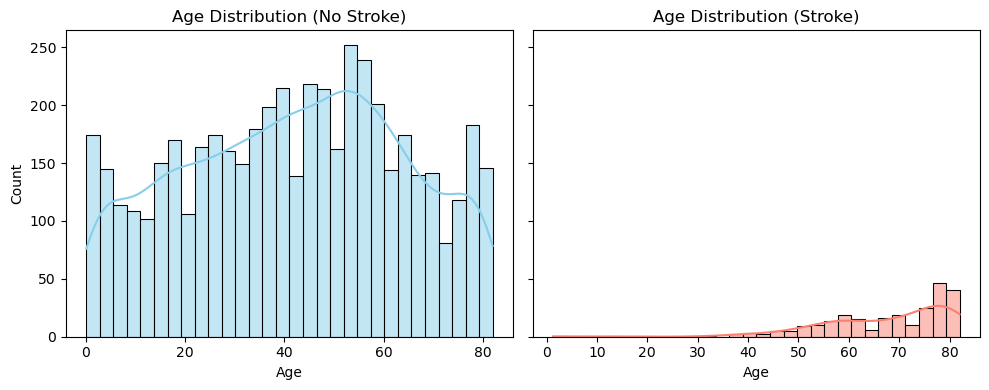

Summary stats for group suffered from stroke:

count    249.000000
mean      67.728193
std       12.727419
min        1.320000
25%       59.000000
50%       71.000000
75%       78.000000
max       82.000000
Name: age, dtype: float64


In [42]:
# Check age distribution for those that did and did not suffer a stroke
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

sns.histplot(df[df['stroke'] == 0]['age'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution (No Stroke)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

sns.histplot(df[df['stroke'] == 1]['age'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Age Distribution (Stroke)')
axes[1].set_xlabel('Age')
plt.tight_layout()
plt.show()

print('Summary stats for group suffered from stroke:\n')
print(df[df['stroke'] == 1]['age'].describe())

We can see that strokes really start to only affect people that are late 30s and older (although somebody under 2 years old did suffer one). It seems like `age` has some predictive power here, so we'll definitely want to use this feature when building our models later. 